# Projeto 2 de Ciência de dados:
 
 

##### Integrantes:
* #### Jean Silas
* #### Isabelle Moschini
* #### Matheus Barros
* #### Rafael Evangelista

  O Projeto consiste em utilizar dados de aplicativos da Google PlayStore para prever o número de downloads de um aplicativo utilizando regressão. 

## Importando as bibliotecas e lendo a base de dados (dataset) :

In [83]:
#Importando as Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy.stats

In [57]:
#Abrindo o Dataset
dataset = pd.read_csv('googleplaystore.csv')

#Verificando suas dimensões
print('Este dataset possui {} linhas e {} colunas'.format(dataset.shape[0],dataset.shape[1]))

Este dataset possui 10841 linhas e 13 colunas


In [58]:
#Sondando os dados
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
#Sondando os tipos de dados
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

  _Como, a priori, estamos pensando em um modelo em que utilize regressão, logo precisaremos transformar quase todas a varáveis temos em numéricas. Além de precisar fazer um tratamento dos dados_

# Pré-processamento de dados:

  _Após visualizar superficialmente os dados, vamos partir para a tratamento deles: Remover as colunas que não são interessantes a priori para a nosso modelo, remover espaços vazios e outros processos de limpeza_

In [60]:
# O grupo entendeu que as colunas App, Size, Genres, Last Updated, Current Ver e Android Ver não são interessantes inicialmente para o modelo qu temos em mente
data0 = dataset.drop(columns=['App', 'Size', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])
data0.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone


In [61]:
#Estamos eliminando as linhas que possuem valores vazios
data0 = data0.dropna()
data0.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone


_Vamos avaliar as frequências de cada variável, para assim entender como está o dataset e precisar os próximos passos de limpeza._

In [62]:
data0.Category.value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [63]:
data0.Rating.value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [64]:
data0.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
148990     1
4326       1
29707      1
1643       1
3103       1
Name: Reviews, Length: 5992, dtype: int64

In [65]:
#Definindo função que limpa e transforma em valor numérico
def Installs_clean(valor):
    valor_str = str(valor)
    return int(valor_str.replace('+', '').replace(',',''))

In [66]:
data0.Installs = data0.Installs.astype(str).map(Installs_clean)
data0.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [67]:
data0.Type.value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [68]:
#Definindo função que limpa
def Price_clean(valor):
    valor_str = str(valor)
    return int(valor_str.replace('$', '').replace('.',''))

In [69]:
data0.Price = data0.Price.astype(str).map(Price_clean)
data0.Price.value_counts()

0        8719
299       114
99        107
499        70
199        59
         ... 
40000       1
3999        1
459         1
175         1
159         1
Name: Price, Length: 73, dtype: int64

In [70]:
data0 = data0.loc[data0['Content Rating'] != 'Adults only 18+', :]
data0 = data0.loc[data0['Content Rating'] != 'Unrated', :]
data0['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [71]:
data0.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen
4,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone


In [118]:
# Transformando todos os valores numéricos em float
data0.Reviews = data0.Reviews.astype('float64')
data0.Installs = data0.Installs.astype('float64')
data0.Price = data0.Price.astype('float64')
data0.dtypes

Category           object
Rating            float64
Reviews           float64
Installs          float64
Type               object
Price             float64
Content Rating     object
dtype: object

## Analise exploratória do dataset:
   _Como o nosso dataset possui tanto variáveis qualitativas quanto quantitivas então separaremos as análises que cabem a cada tipode variável._

In [119]:
#Entendendo as medidas das variáveis numéricas.
data0.describe()

,Rating,Reviews,Installs,Price
count,9362.000000,9.362000e+03,9.362000e+03,9362.000000
mean,4.191733,5.142607e+05,1.790487e+07,96.133839
std,0.515285,3.144697e+06,9.125700e+07,1581.995094
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.860000e+02,1.000000e+04,0.000000
50%,4.300000,5.916500e+03,5.000000e+05,0.000000
75%,4.500000,8.159625e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,40000.000000


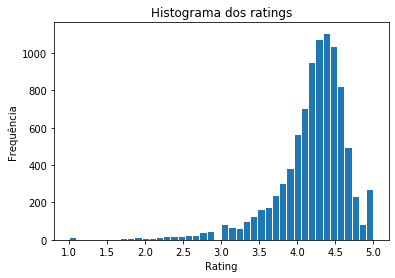

In [84]:
#Sondado a distribuição de Rating
plt.hist(data0.Rating,bins=42,edgecolor='white')
plt.title("Histograma dos ratings")
plt.xlabel("Rating")
plt.ylabel("Frequência")
plt.show()

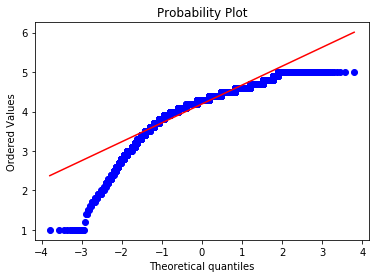

In [92]:
# O modelo aparenta ser uma distribuição normal, para isso verificaremos:
stats.probplot(data0.Rating,dist="norm",plot=plt)
plt.show()

_Com esse gráfico constatamos que a distribuição não é normal, e portanto nossa suposição estava errada_

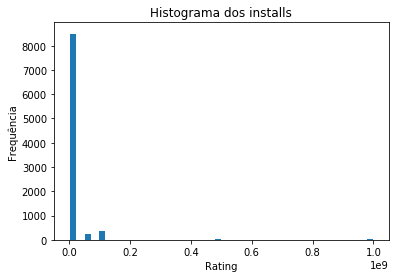

In [99]:
#Sondado a distribuição de Installs
plt.hist(data0.Installs,bins=42,edgecolor='white')
plt.title("Histograma dos installs")
plt.xlabel("Rating")
plt.ylabel("Frequência")
plt.show()

_Verificamos que a variável install se concentra na vizinhança de um valor. Vamos tentar entender isso, verificando os valores numericamente_

In [126]:
#Sondando a situação
data0.Reviews.value_counts(True)

2.0          0.008866
3.0          0.008332
4.0          0.007904
5.0          0.007904
1.0          0.007157
               ...   
4289.0       0.000107
62465.0      0.000107
2052407.0    0.000107
36490.0      0.000107
909204.0     0.000107
Name: Reviews, Length: 5988, dtype: float64

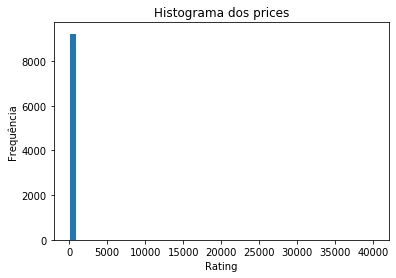

In [103]:
#Sondado a distribuição de Price
plt.hist(data0.Price,bins=42,edgecolor='white')
plt.title("Histograma dos prices")
plt.xlabel("Rating")
plt.ylabel("Frequência")
plt.show()

_Assim como o Install, o Price se concentra na vizinhança de um valor, que neste caso seria o zero. Com isso, podemos supor que a grande maioria dos apps são gratuitos. Para verificar tal suposição, verificamos a frequência dessa variável numricamente_

In [105]:
#Verificando a suposiçaõ anterior:
data0.Price.value_counts(True)

0        0.930891
299      0.012177
99       0.011429
499      0.007477
199      0.006302
           ...   
40000    0.000107
3999     0.000107
459      0.000107
175      0.000107
159      0.000107
Name: Price, Length: 73, dtype: float64

_Com isso, confirmarmos a hipótese que grande parte dos aplicativos são gratuitos, já que 93% deles são Free_

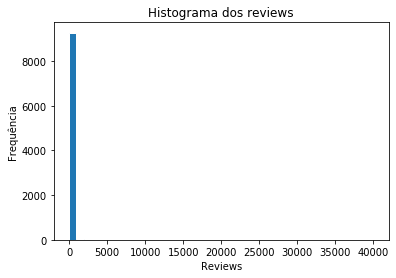

In [123]:
#Sondado a distribuição de Reviews
plt.hist(data0.Price,bins=42,edgecolor='white')
plt.title("Histograma dos reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequência")
plt.show()

_Assim como as variáveis Install e Price, Review também está concentrado na vizinhança de um valor Para verificar que valor seria esse, verificamos a frequencia numericamente_

In [124]:
#Verificando o valor 
data0.Reviews.value_counts(True)

2.0          0.008866
3.0          0.008332
4.0          0.007904
5.0          0.007904
1.0          0.007157
               ...   
4289.0       0.000107
62465.0      0.000107
2052407.0    0.000107
36490.0      0.000107
909204.0     0.000107
Name: Reviews, Length: 5988, dtype: float64

_Diferente do Price, os reviews não estão concentrados em um valor, mas sim em um intervalo_

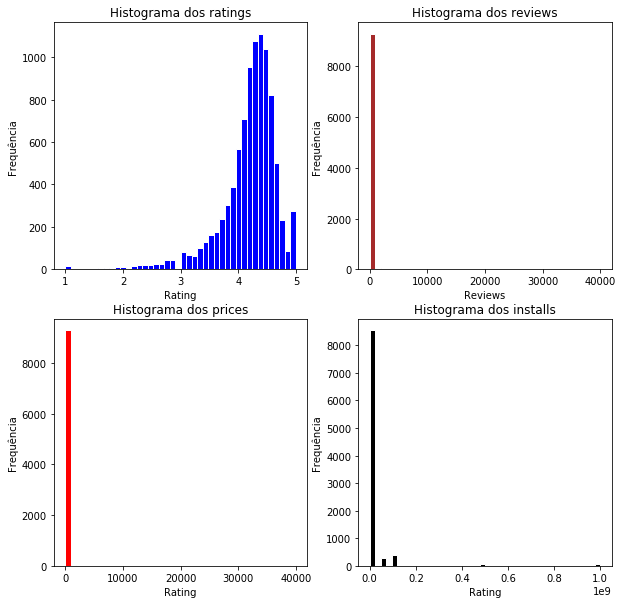

In [142]:
#Juntando os gráficos
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.hist(data0.Rating,bins=42,edgecolor='white',color='blue')
plt.title("Histograma dos ratings")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.subplot(222)
plt.hist(data0.Price,bins=42,edgecolor='white',color='brown')
plt.title("Histograma dos reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequência")

plt.subplot(223)
plt.hist(data0.Price,bins=42,edgecolor='white', color='red')
plt.title("Histograma dos prices")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.subplot(224)
plt.hist(data0.Installs,bins=42,edgecolor='white', color='black')
plt.title("Histograma dos installs")
plt.xlabel("Rating")
plt.ylabel("Frequência")

plt.show()

## _Para entendermos ainda melhor essas 4 variáveis quantitavas, vamos plotar mais alguns gráficos:_
   _Assim podemos entender, por exemplo, a questão dos outliers._

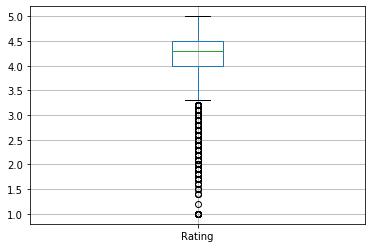

In [137]:
data0.boxplot(column='Rating');

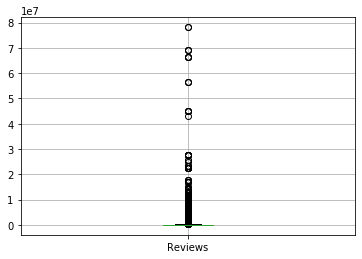

In [130]:
data0.boxplot(column='Reviews');

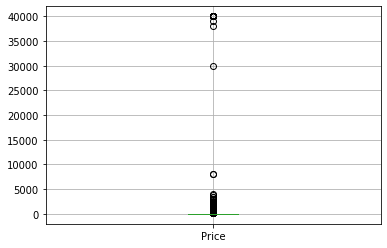

In [131]:
data0.boxplot(column='Price');

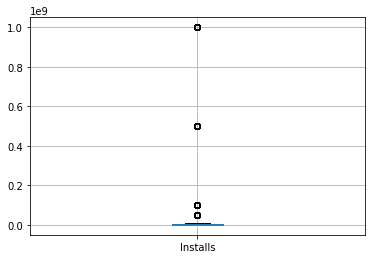

In [133]:
data0.boxplot(column='Installs');

#### _E para terminar a análise das variáveis quantitativas, vamos verificar a correlação entre elas:_

In [165]:
#Verificando entre as variáveis quantitativas
pd.DataFrame.corr(data0)

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068154,0.051368,-0.021902
Reviews,0.068154,1.000000,0.641608,-0.009824
Installs,0.051368,0.641608,1.000000,-0.011895
Price,-0.021902,-0.009824,-0.011895,1.000000


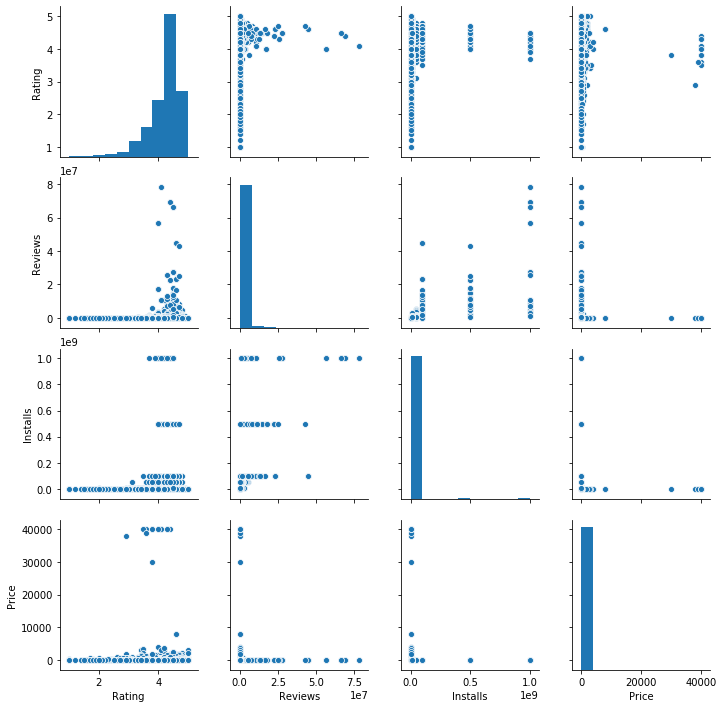

In [168]:
sns.pairplot(data0);

## Anélise exploratória: entendendo os dados qualitativos
   _Agora analisaremos as váriaveis qualitativas: Category e Content Rating_ 

In [144]:
#Verificando a frequência de cada classe de Category:
data0.Category.value_counts()

FAMILY                 0.186605
GAME                   0.117176
TOOLS                  0.078295
PRODUCTIVITY           0.037492
MEDICAL                0.037385
COMMUNICATION          0.035035
FINANCE                0.034501
SPORTS                 0.033967
PHOTOGRAPHY            0.033860
LIFESTYLE              0.033540
PERSONALIZATION        0.033540
BUSINESS               0.032365
HEALTH_AND_FITNESS     0.031724
SOCIAL                 0.027665
SHOPPING               0.025422
NEWS_AND_MAGAZINES     0.024888
TRAVEL_AND_LOCAL       0.024140
DATING                 0.020829
BOOKS_AND_REFERENCE    0.019013
VIDEO_PLAYERS          0.017090
EDUCATION              0.016556
ENTERTAINMENT          0.015915
MAPS_AND_NAVIGATION    0.013245
FOOD_AND_DRINK         0.011643
HOUSE_AND_HOME         0.008118
WEATHER                0.008011
AUTO_AND_VEHICLES      0.007797
LIBRARIES_AND_DEMO     0.006943
ART_AND_DESIGN         0.006623
COMICS                 0.005982
PARENTING              0.005341
EVENTS  

In [145]:
#Verificando a frequência de cada classe de Content Rating:
data0['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

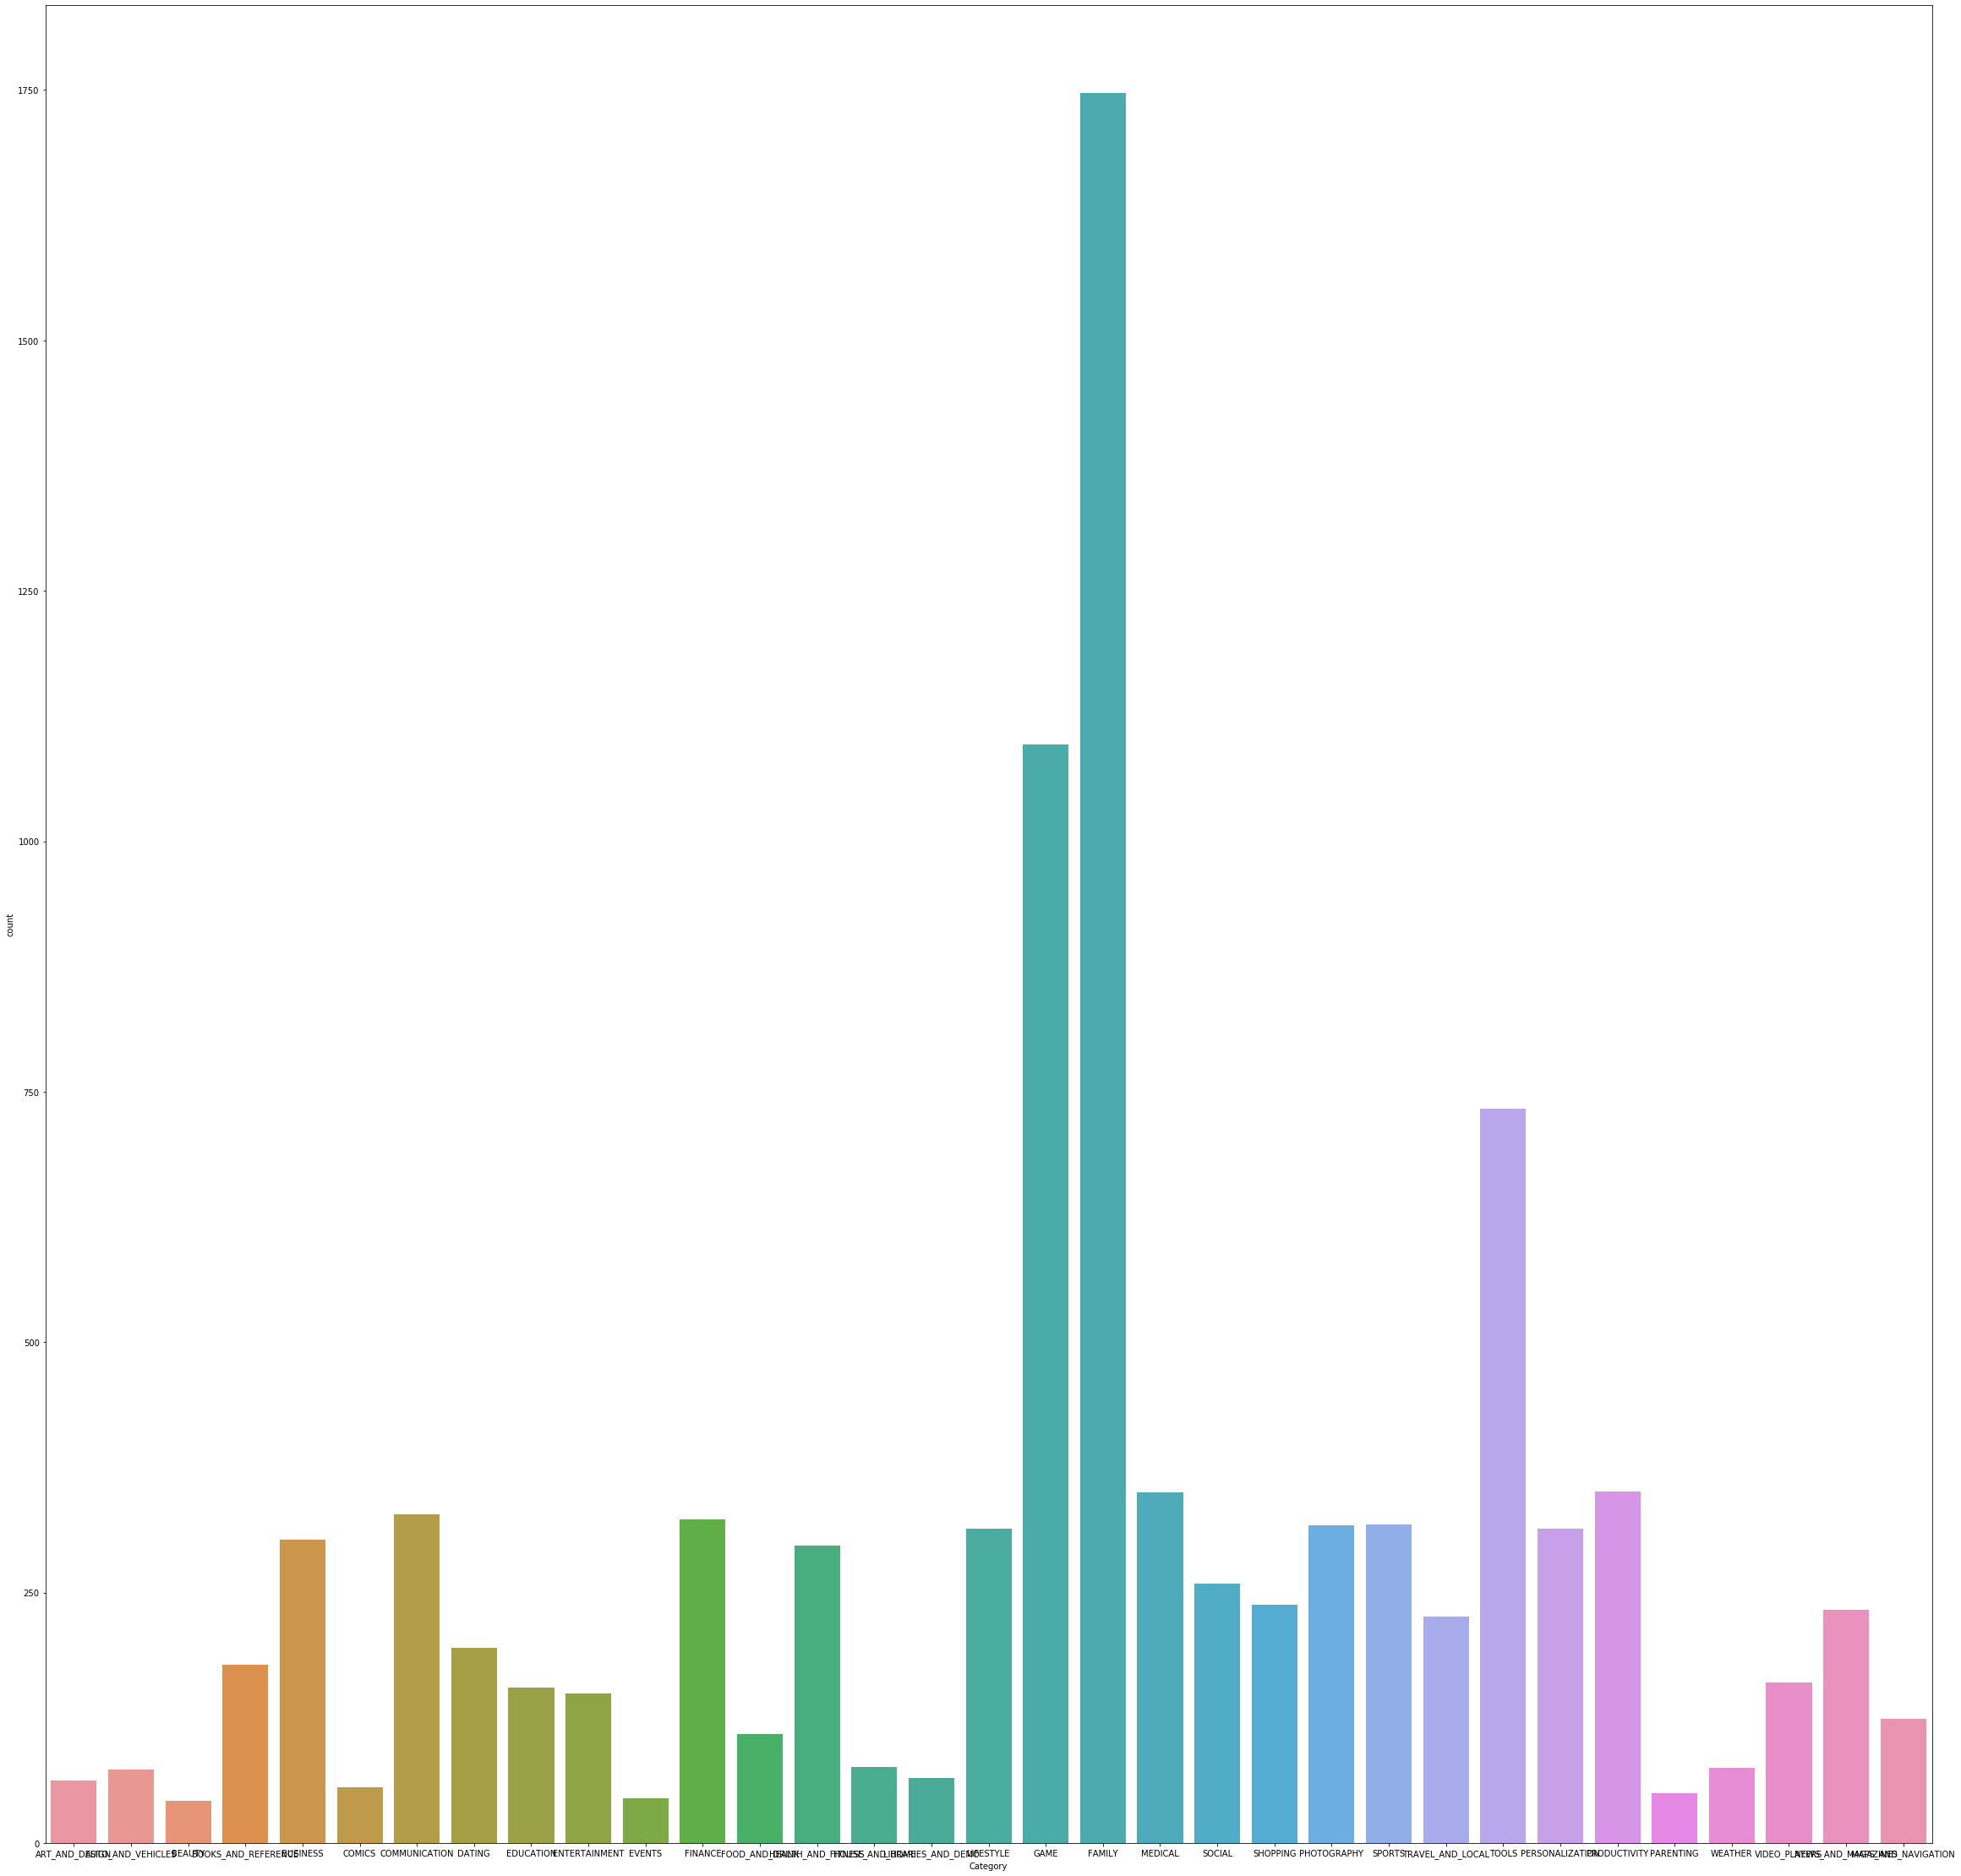

In [158]:
#Verificando a frequência de cada classe de Category graficamente
plt.figure(figsize=(40, 40))
sns.countplot(data0.Category);

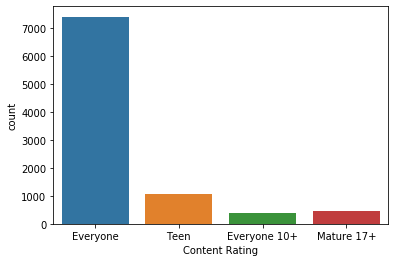

In [160]:
#Verificando a frequência de cada classe de Content Rating graficamente
sns.countplot(data0['Content Rating']);

Pessoal, aqui é o Jean falando :) . Então, vocês podem editar o que vocês acharem que não ficou bom, ou algo assim. Não sei se essa parte das variáveis catégoricas já terminaram. Vocês que sabem. No próximo código, já vou deixar o data frame atualizado para dummies, mas vou deixar guardado em outra variável para não dar problemas. Bejinhos e abraços! ( menos pro Rafa). 
Link ensinando a passar para dummies:https://www.youtube.com/watch?v=B6SLgfWcJXM
                                     https://www.youtube.com/watch?v=0s_1IsROgDc

In [171]:
#Vamos transformar as variáveis catégoricas em dummies:
df_d = pd.get_dummies(data0, columns=['Category','Type','Content Rating'], drop_first=True) 
print('Este dataset possui {} linhas e {} colunas'.format(df_d.shape[0],df_d.shape[1]))

Este dataset possui 9362 linhas e 40 colunas


In [172]:
df_d.head()

,Rating,Reviews,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,4.1,159.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,500000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,50000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967.0,100000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
